## Ворошилов Владислав
## ПИ20-3

### Семинар 13

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


### 1. Загрузите прилагающийся датасет.

In [2]:
df = pd.read_csv("./data/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [3]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

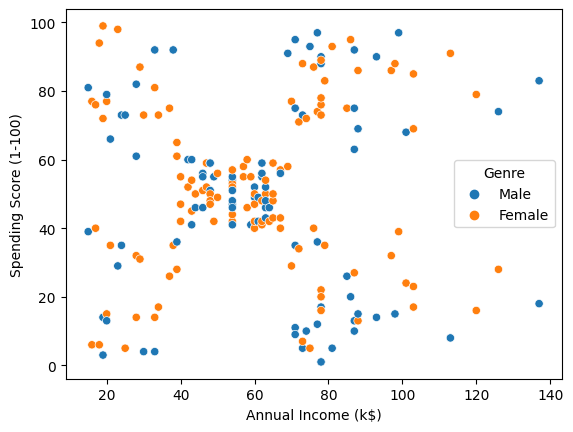

In [4]:
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Genre')

Text(0.5, 1.0, 'DataFrame')

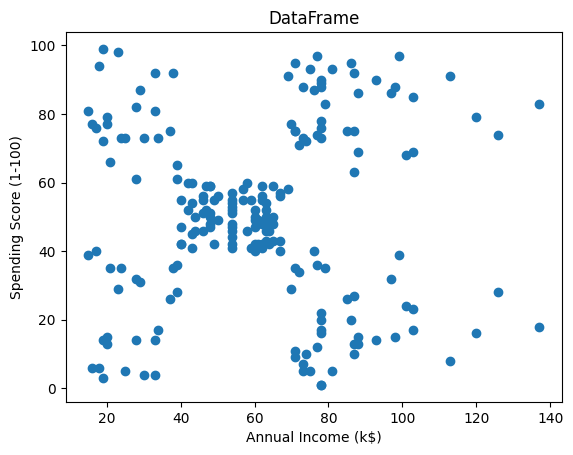

In [5]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.title('DataFrame')

### 4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

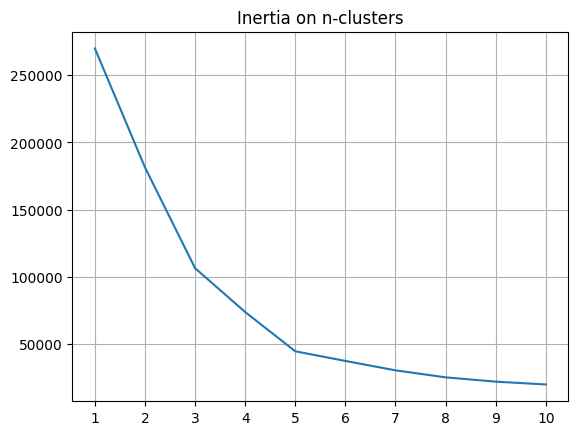

In [6]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,random_state=50)
    k_means.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    wcss.append(k_means.inertia_)
    
plt.title("Inertia on n-clusters")
plt.plot(range(1,11),wcss)
plt.xticks(range(1, 11))
plt.grid()


### 5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [7]:
model = KMeans(n_clusters=5)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(df[["Annual Income (k$)", "Spending Score (1-100)"]]), columns=["Annual Income (k$)", "Spending Score (1-100)"])
train_labels = model.fit_predict(train_scaled)


In [9]:
df_labeled = df
df_labeled["cluster"] = train_labels

In [10]:
df_labeled.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


Text(0.5, 1.0, 'DataFrame with clusters')

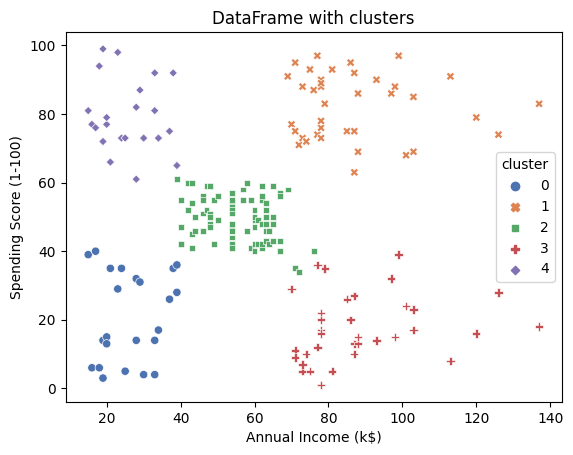

In [11]:
sns.scatterplot(x='Annual Income (k$)', 
                y = 'Spending Score (1-100)', 
                data=df_labeled, 
                hue='cluster', 
                style='cluster', 
                palette="deep")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.title('DataFrame with clusters')

### 6. Построить графическую интерпретацию из пункта 3, с центрами кластеров.

Text(0.5, 1.0, 'Clusterized data')

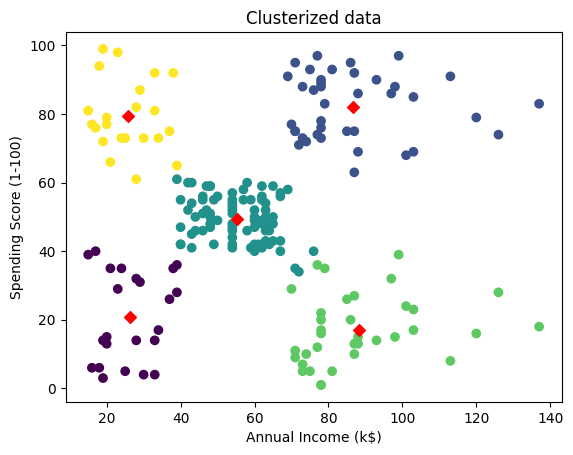

In [12]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.title('Clusterized data')

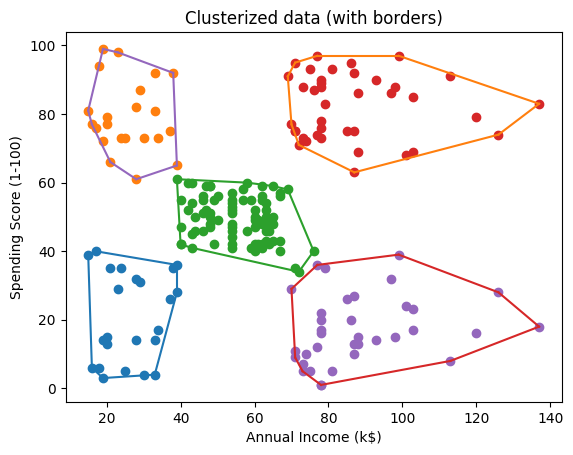

In [71]:
from scipy.spatial import ConvexHull
import matplotlib.colors as mcolors

for i in df["cluster"].unique():
    df_i = df[df["cluster"] == i]
    x = df_i["Annual Income (k$)"].to_numpy()
    y = df_i["Spending Score (1-100)"].to_numpy()
    xy = np.hstack((x[:,np.newaxis],y[:,np.newaxis]))
    
    hull = ConvexHull(xy)

    plt.scatter(x,y)
    for simplex in hull.simplices:
            plt.plot(x[simplex], y[simplex], list(mcolors.TABLEAU_COLORS.values())[i])
#     plt.plot(x[hull.vertices], y[hull.vertices])
    
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.title('Clusterized data (with borders)')
plt.show()

### 7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

Text(0.5, 1.0, 'Age on Income/Score clusters')

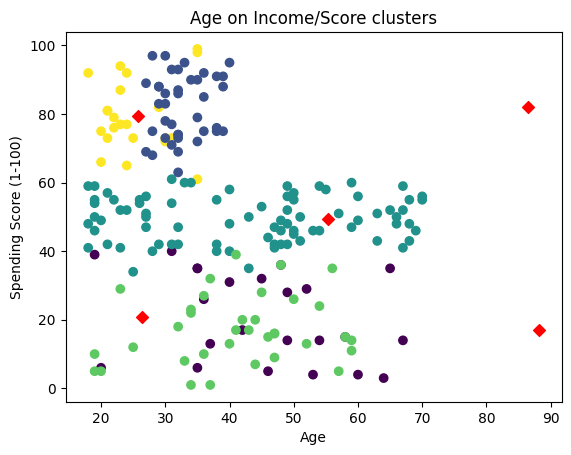

In [13]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(df["Age"], df["Spending Score (1-100)"], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

plt.title('Age on Income/Score clusters')

### 8. Оцените модель с помощью метрик.

In [14]:
print(silhouette_score(train_scaled, train_labels))
print(calinski_harabasz_score(train_scaled, train_labels))

0.5594854531227246
264.729808752159


### 9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

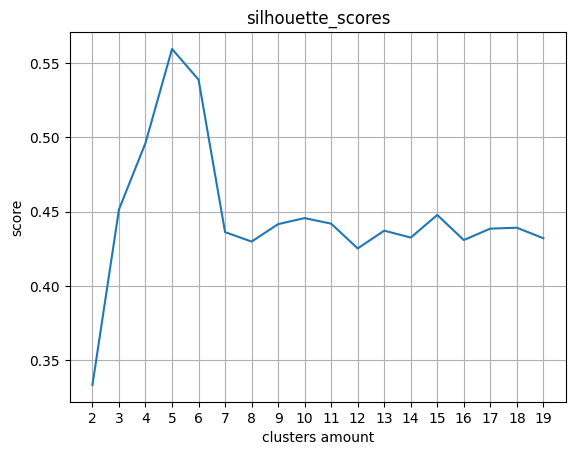

In [15]:
silhouette_scores = []

for i in range(2, 20):
    temp_model = KMeans(n_clusters=i, random_state=50)
    temp_model.fit(train_scaled)
    temp_predict = temp_model.predict(train_scaled)

    
    silhouette_scores.append(silhouette_score(train_scaled, temp_predict))

plt.plot(range(2, 20), silhouette_scores)
plt.xticks(range(2, 20))

plt.title('silhouette_scores')
plt.ylabel('score')
plt.xlabel('clusters amount')
plt.grid()
plt.show()

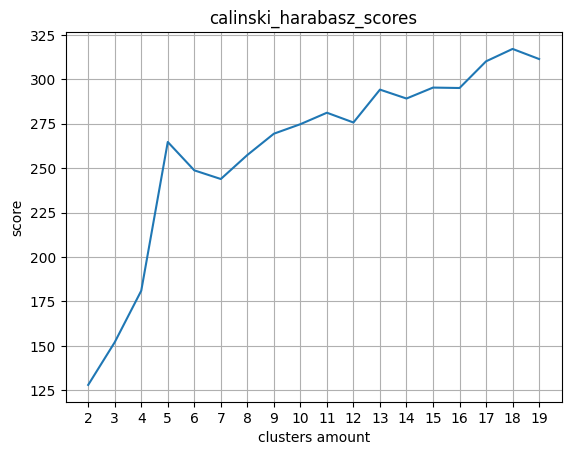

In [19]:
calinski_harabasz_scores = []

for i in range(2, 20):
    temp_model = KMeans(n_clusters=i, random_state=50)
    temp_model.fit(train_scaled)
    temp_predict = temp_model.predict(train_scaled)

    
    calinski_harabasz_scores.append(calinski_harabasz_score(train_scaled, temp_predict))


plt.plot(range(2, 20), calinski_harabasz_scores)
plt.xticks(range(2, 20))
plt.title('calinski_harabasz_scores')
plt.ylabel('score')
plt.xlabel('clusters amount')
plt.grid()

plt.show()

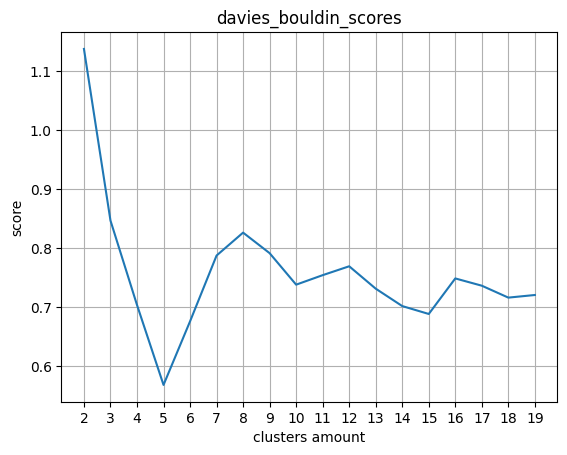

In [17]:
# The minimum score is zero, with lower values indicating better clustering.

davies_bouldin_scores = []

for i in range(2, 20):
    temp_model = KMeans(n_clusters=i, random_state=50)
    temp_model.fit(train_scaled)
    temp_predict = temp_model.predict(train_scaled)

    
    davies_bouldin_scores.append(davies_bouldin_score(train_scaled, temp_predict))


plt.plot(range(2, 20), davies_bouldin_scores)
plt.xticks(range(2, 20))
plt.title('davies_bouldin_scores')
plt.ylabel('score')
plt.xlabel('clusters amount')
plt.grid()

plt.show()